<a href="https://colab.research.google.com/github/MrBriit/Full-Stack_Session1Assignment/blob/master/Zomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
from wordcloud import WordCloud
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import ast 
plt.xkcd()
import matplotlib.ticker as mtick
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = 10,6
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
!ls /content/

drive  sample_data  zomato.csv


In [19]:

data = pd.read_csv('/content/drive/My Drive/zomato.csv')

In [20]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Columns description

1. <b>url </B> contains the url of the restaurant in the zomato website

2. **address** contains the address of the restaurant in Bengaluru

3. **name** contains the name of the restaurant

4. **online_order** whether online ordering is available in the restaurant or not

5. **book_table** table book option available or not

6. **rate** contains the overall rating of the restaurant out of 5

7. **votes** contains total number of rating for the restaurant as of the above mentioned date

8. **phone** contains the phone number of the restaurant

9. **location** contains the neighborhood in which the restaurant is located

10. **rest_type** restaurant type

11. **dish_liked** dishes people liked in the restaurant

12. **cuisines** food styles, separated by comma

13. **approx_cost**(for two people) contains the approximate cost for meal for two people

14. **reviews_list** list of tuples containing reviews for the restaurant, each tuple

15. **menu_item** contains list of menus available in the restaurant

16. **listed_in**(type) type of meal

17. **listed_in**(**city**) contains the neighborhood in which the restaurant is listed

In [21]:
data.shape

(51717, 17)

In [22]:
data.dtypes #checking the data types

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [23]:
data.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [106]:
# import pandas_profiling as pf

# pf.ProfileReport(df)

In [24]:
#Deleting Unnnecessary Columns
df=data.drop(['url','phone'],axis=1) #Dropping the column "dish_liked", "phone", "url" and saving the new dataset as "zomato"

In [25]:
df.duplicated().sum()

43

In [26]:
df.drop_duplicates(inplace=True)

In [27]:
df.duplicated().sum()

0

In [28]:
#Remove the NaN values from the dataset
df.dropna(how='any',inplace=True)
df.isnull().sum()

# import pandas_profiling as pf

# pf.ProfileReport(df)

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [29]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [30]:
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [31]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [32]:
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

In [33]:
#zomato['cost'] = zomato['cost'].astype(str) #Changing the cost to string
df['cost'] = df['cost'].apply(lambda x: x.replace(',','')) #Using lambda function to replace ',' from cost
df['cost'] = df['cost'].astype(float)

In [34]:
print(df['cost'].unique())

print('---'*10)

df.dtypes

[ 800.  300.  600.  700.  550.  500.  450.  650.  400.  750.  200.  850.
 1200.  150.  350.  250. 1500. 1300. 1000.  100.  900. 1100. 1600.  950.
  230. 1700. 1400. 1350. 2200. 2000. 1800. 1900.  180.  330. 2500. 2100.
 3000. 2800. 3400.   40. 1250. 3500. 4000. 2400. 1450. 3200. 6000. 1050.
 4100. 2300.  120. 2600. 5000. 3700. 1650. 2700. 4500.]
------------------------------


address          object
name             object
online_order     object
book_table       object
rate             object
votes             int64
location         object
rest_type        object
dish_liked       object
cuisines         object
cost            float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object

In [35]:
#Reading uninque values from the Rate column
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [36]:
df = df.loc[df.rate !='NEW']

In [37]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5',
       '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5', '2.7 /5',
       '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5',
       '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5', '3.3 /5',
       '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5', '3.5 /5',
       '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [38]:
#Removing '/5' from Rates

df['rate'] = df['rate'].apply(lambda x: x.replace('/5',''))



<br>

# Visualisations

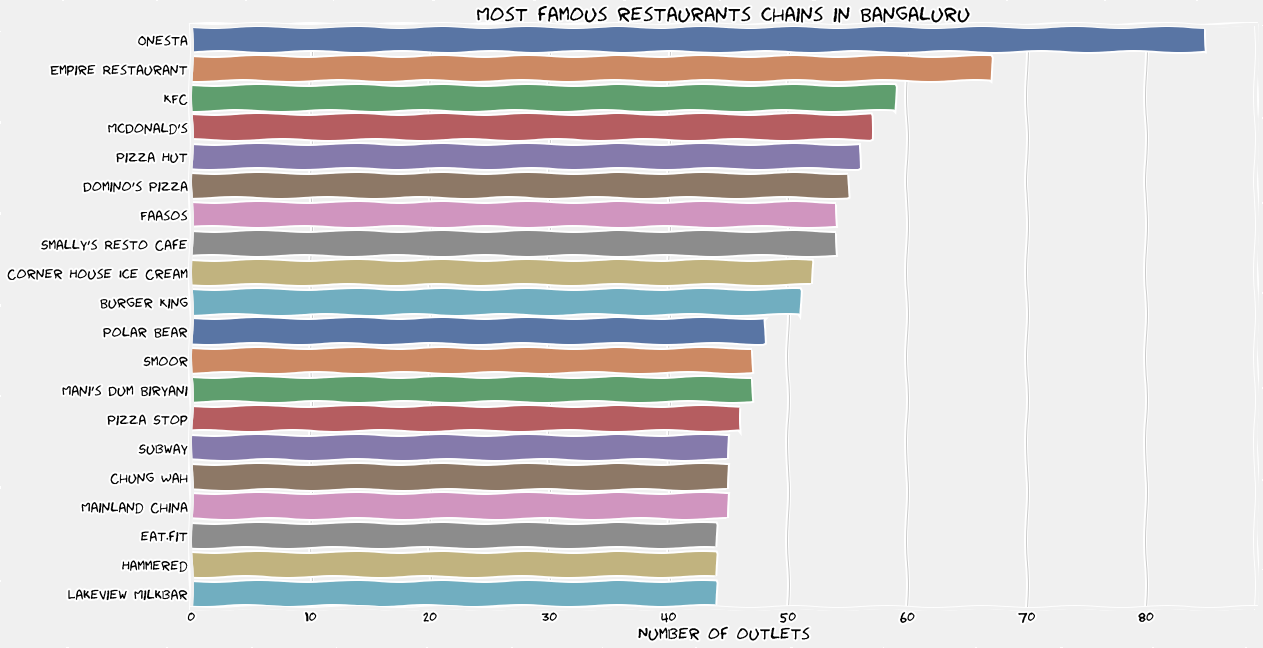

In [39]:
plt.figure(figsize=(17,10))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")
plt.show()

In [72]:
# %matplotlib inline
# # Top Restraunt In Bangalore
# plt.figure(figsize=(17,10))
# chains=df['name'].value_counts()[:20]
# sns.barplot(x=chains,y=chains.index,palette='deep')
# plt.title("Most famous restaurants chains in Bangaluru")
# plt.xlabel("Number of outlets")

In [73]:
! pip install cutecharts

In [74]:
from cutecharts.globals import use_jupyter_lab; use_jupyter_lab()
import cutecharts.charts
from cutecharts.charts import Bar
from cutecharts.components import Page

In [75]:
chart = Bar('Most famous restaurants chains in Bangaluru',width='1000px',height='400px')
chart.set_options(
     labels=list(chains),
     x_label='Days',
     y_label='Temperature (Celsius)',
     colors=['#1EAFAE' for i in range(len(df))]
     )

chart.add_series('This week',list(chains.index))
chart.load_javascript()
chart.render_notebook()

In [76]:
from cutecharts.globals import use_jupyter_lab; use_jupyter_lab()


In [77]:
from cutecharts.faker import Faker

def bar_tickcount_colors():
    chart = Bar('Most famous restaurants chains in Bangaluru',width='1000px',height='800px')
    chart.set_options(labels=list(chains.index), y_tick_count=10, colors=Faker.colors)
    chart.add_series("series-A", list(chains))
    return chart
chart.load_javascript()
bar_tickcount_colors().render_notebook()

In [78]:
x=df['book_table'].value_counts()
colors = ['#800080', '#0000A0']

trace=go.Pie(labels=x.index,values=x,textinfo="value",
            marker=dict(colors=colors, 
                           line=dict(color='#001000', width=2)))
layout=go.Layout(title="Table booking",width=600,height=600)
fig=go.Figure(data=[trace],layout=layout)
py.iplot(fig, filename='pie_chart_subplots')

**Insight**

Most of the Restaurants do not offer table booking

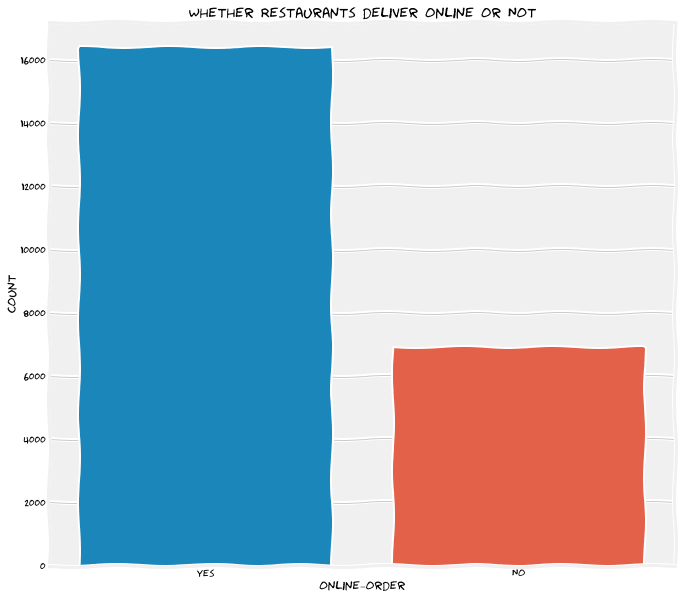

In [79]:
#Restaurants delivering Online or not
sns.countplot(df['online_order'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Whether Restaurants deliver online or Not')
plt.show()

**Insight:**

Most Restaurants offer option for online order and delivery


<br>

<br>

## **Rating Distributions**

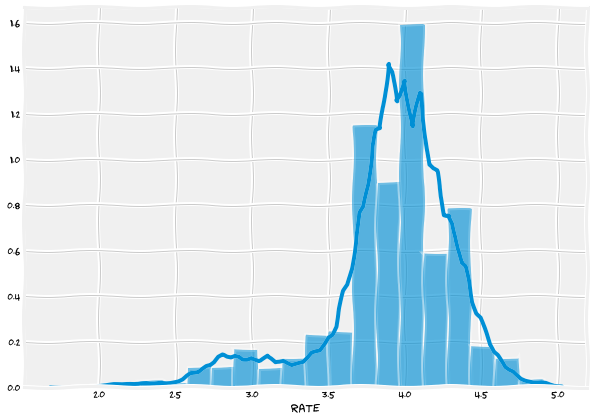

In [80]:
#How ratings are distributed
plt.figure(figsize=(9,7))

sns.distplot(df['rate'],bins=20)



*  **Insight**

  We can infer from above that most of the ratings are within 3.5 and 4.5



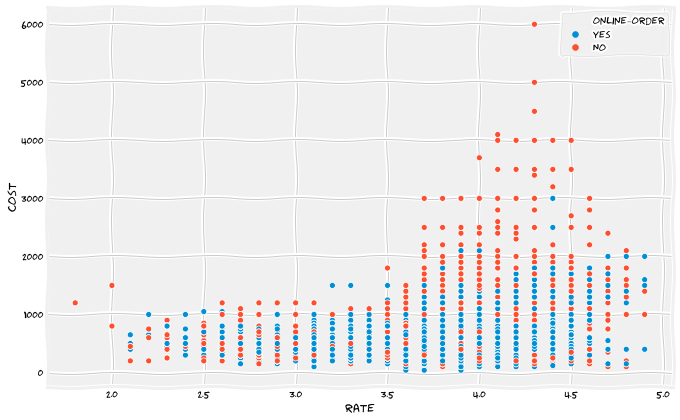

In [81]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="rate",y='cost',hue='online_order',data=df)
plt.show()

In [82]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 4.6, 4. , 4.2, 3.9, 3. , 3.6, 2.8, 4.4, 3.1, 4.3,
       2.6, 3.3, 3.5, 3.2, 4.5, 2.5, 2.9, 3.4, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [83]:
df['rate'].min()

1.8

In [84]:
df['rate'].max()

4.9

In [85]:
df['rate']=df['rate'].astype(float)

In [86]:
((df['rate']>=1) & (df['rate']<2)).sum()

5

In [87]:
((df['rate']>=2) & (df['rate']<3)).sum()

1179

In [88]:
((df['rate']>=3) & (df['rate']<4)).sum()

10153

In [89]:
(df['rate']>=4).sum()

11911

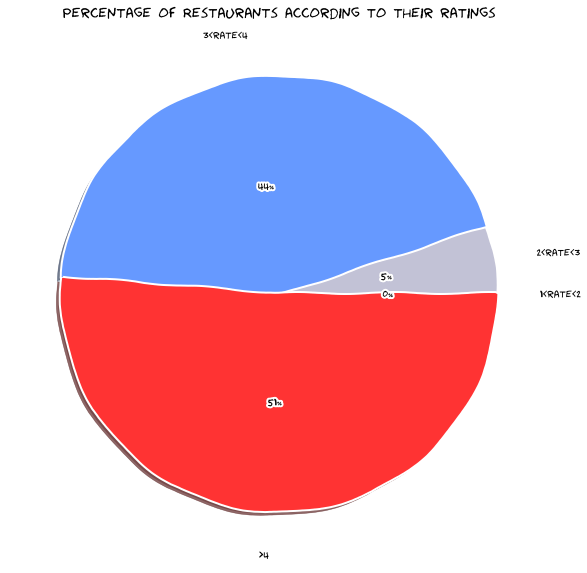

In [90]:
slices=[((df['rate']>=1) & (df['rate']<2)).sum(),
        ((df['rate']>=2) & (df['rate']<3)).sum(),
        ((df['rate']>=3) & (df['rate']<4)).sum(),
        (df['rate']>=4).sum()
        ]

labels=['1<rate<2','2<rate<3','3<rate<4','>4']
colors = ['#ff3333','#c2c2d6','#6699ff']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their ratings")

fig.set_size_inches(10,10)
plt.show()

<br>
<br>

## **Services Types**

Text(0.5, 1.0, 'Type of Service')

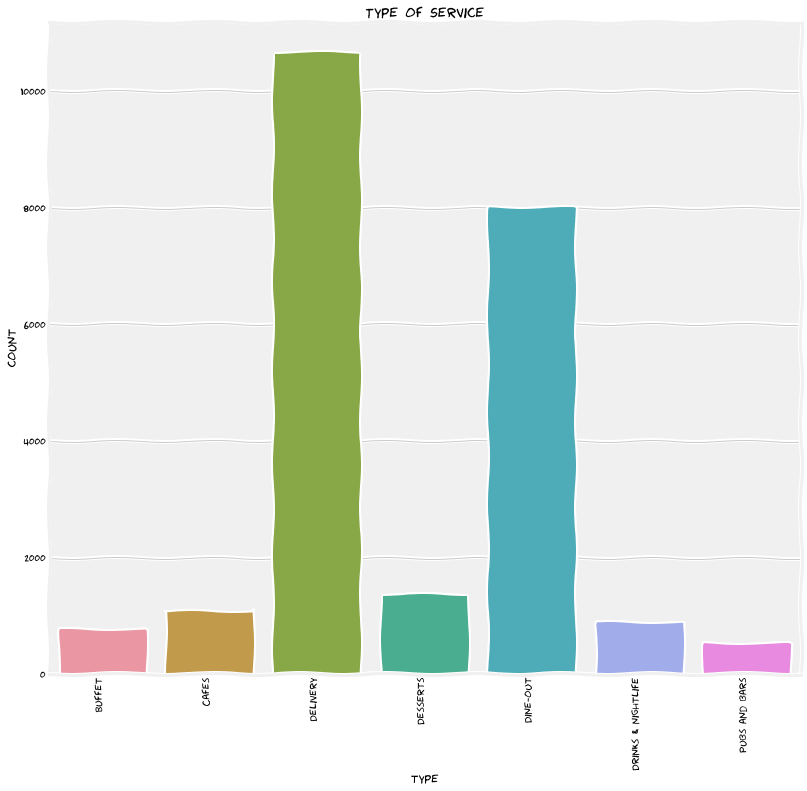

In [91]:
#Types of Services

sns.countplot(df['type']).set_xticklabels(sns.countplot(df['type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.title('Type of Service')

Here the two main service types are **Delivery** and **Dine-out**

<br>
<br>

## **Distribution of Cost of Food for two People**

In [92]:
from plotly.offline import iplot

In [93]:
trace0=go.Box(y=df['cost'],name="accepting online orders",
              marker = dict(
        color = 'rgb(113, 10, 100)',
    ))
data=[trace0]
layout=go.Layout(title="Box plot of approximate cost",width=800,height=800,yaxis=dict(title="Price"))
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)

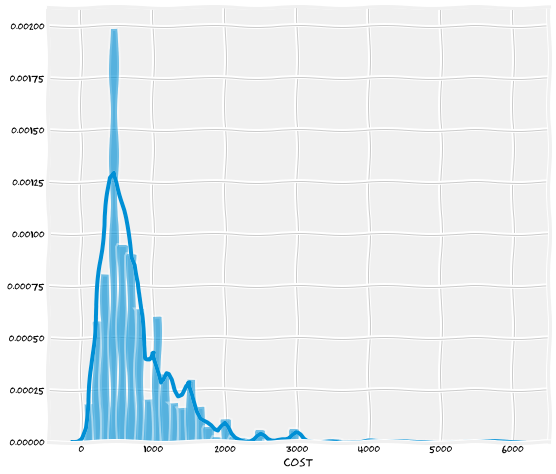

In [94]:
plt.figure(figsize=(8,8))
sns.distplot(df['cost'])
plt.show()

## **Most Liked Dishes**

In [95]:
#re=regular expression (use for splitting words)

import re

df.index=range(df.shape[0])
likes=[]
for i in range(df.shape[0]):
    array_split=re.split(',',df['dish_liked'][i])
    for item in array_split:
        likes.append(item)

In [96]:
df.index=range(df.shape[0])

In [97]:
df.index

RangeIndex(start=0, stop=23248, step=1)

In [98]:
print("Count of Most liked dishes in Bangalore")
favourite_food = pd.Series(likes).value_counts()
favourite_food.head(30)

Count of Most liked dishes in Bangalore


 Pasta              2692
 Pizza              1915
 Cocktails          1880
 Burgers            1736
 Mocktails          1623
 Biryani            1307
 Sandwiches         1287
Burgers             1256
 Coffee             1184
 Nachos             1170
 Fish               1116
 Paratha            1107
 Salads             1055
 Chicken Biryani    1004
Cocktails            891
 Fries               876
 Noodles             854
 Beer                835
 Mutton Biryani      832
 Tea                 819
Coffee               801
 Sandwich            788
 Butter Chicken      782
 Thali               770
Biryani              749
Pizza                747
 Roti                729
 Brownie             726
 Salad               677
 Hot Chocolate       672
dtype: int64

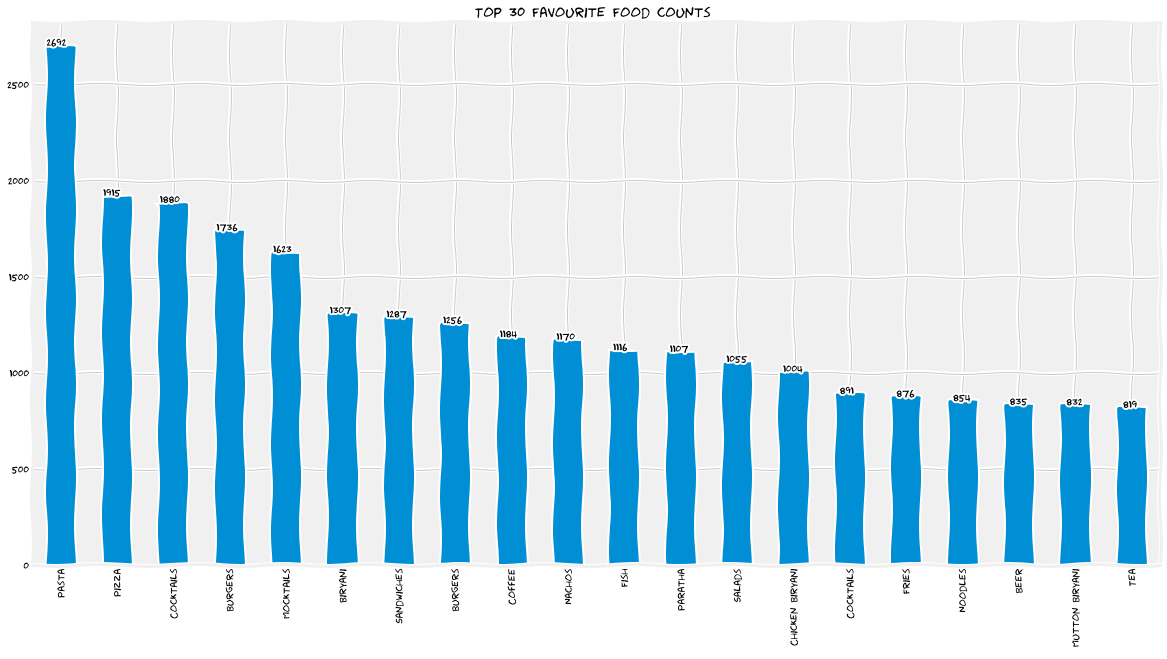

In [99]:
ax = favourite_food.nlargest(n=20, keep='first').plot(kind='bar',figsize=(18,10),title = 'Top 30 Favourite Food counts ')

for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005))

We can infer from the analysis that the 5 most liked dishes are **Pasta**,**Pizza**,**Cocktails**,**Burgers**,and **Mocktails**

Text(0.5, 0, 'count')

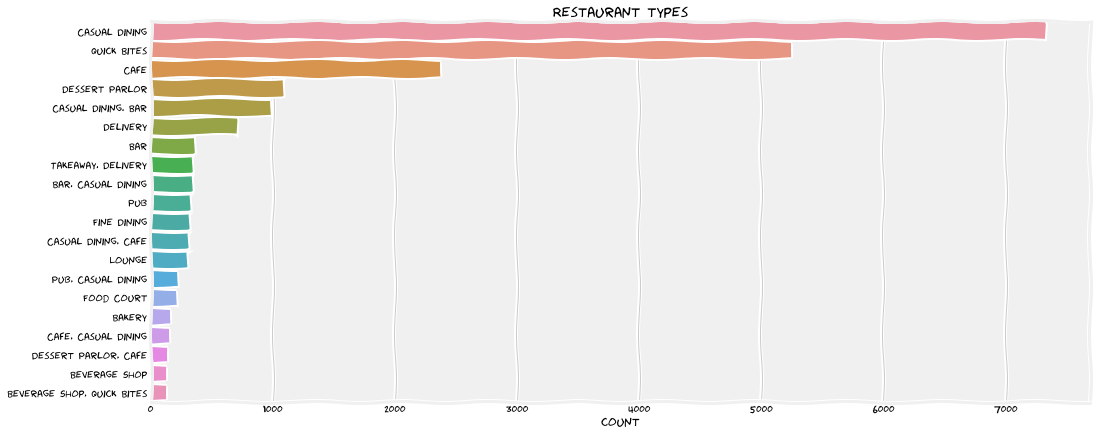

In [100]:
plt.figure(figsize=(15,7))
rest=df['rest_type'].value_counts()[:20]
sns.barplot(rest,rest.index)
plt.title("Restaurant types")
plt.xlabel("count")

**Casual Dining**, **Quick Bites** and **Cafe** are the 3 most common types of Restaurants in Banglore

<br>
<br>

## **Most famous Restaurants**

Text(0.5, 0, 'Number of outlets')

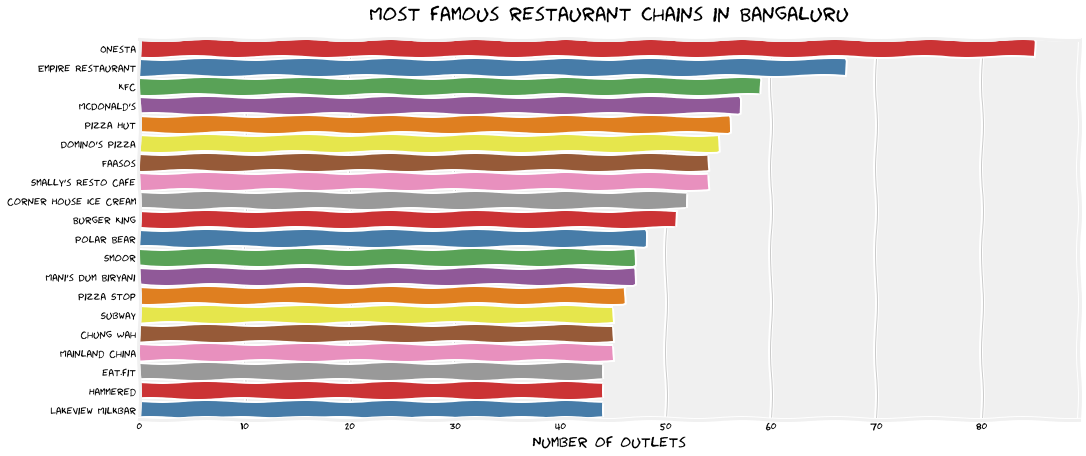

In [101]:
plt.figure(figsize=(15,7))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

<br>
<br>
<br>

# **Building Our Model**

In [102]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [103]:
# #Defining the independent variables and dependent variables
# x = zomato_en.iloc[:,[2,3,5,6,7,8,9,11]]
# y = zomato_en['rate']
# #Getting Test and Training Set
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
# x_train.head()

In [108]:
df.online_order[df.online_order == 'Yes'] = 1 
df.online_order[df.online_order == 'No'] = 0

In [117]:
df.online_order.value_counts()

1    16378
0     6870
Name: online_order, dtype: int64

In [110]:
df.online_order = pd.to_numeric(df.online_order)

In [111]:
df.book_table[df.book_table == 'Yes'] = 1 
df.book_table[df.book_table == 'No'] = 0

In [112]:
df.book_table = pd.to_numeric(df.book_table)

In [113]:
df.book_table.value_counts()

0    17191
1     6057
Name: book_table, dtype: int64

In [118]:
df['cost'].dtype

dtype('float64')

In [119]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [120]:
df.location = le.fit_transform(df.location)
df.rest_type = le.fit_transform(df.rest_type)
df.cuisines = le.fit_transform(df.cuisines)
df.menu_item = le.fit_transform(df.menu_item)

In [121]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,1,20,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",1386,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",5047,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,1,20,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",594,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",5047,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,1,16,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",484,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",5047,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,1,62,Masala Dosa,1587,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",5047,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,4,20,"Panipuri, Gol Gappe",1406,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",5047,Buffet,Banashankari


In [125]:
x = df.iloc[:,[2,3,5,6,7,9,10,12]]
x.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,775,1,20,1386,800.0,5047
1,1,0,787,1,20,594,800.0,5047
2,1,0,918,1,16,484,800.0,5047
3,0,0,88,1,62,1587,300.0,5047
4,0,0,166,4,20,1406,600.0,5047


In [126]:
y = df['rate']
y

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
23243    3.8
23244    3.9
23245    2.8
23246    2.5
23247    4.3
Name: rate, Length: 23248, dtype: float64

In [145]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=10)


<br>
<br>

## **Linear Regression**

In [146]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [147]:
from sklearn.metrics import r2_score
y_pred=lr_model.predict(x_test)
r2_score(y_test,y_pred)

0.2281882852296705

<br>
<br>

## **DecisionTree**

In [135]:
from sklearn.tree import DecisionTreeRegressor

In [148]:
from sklearn.ensemble import RandomForestRegressor
RF_Model=RandomForestRegressor(n_estimators=650,random_state=245,min_samples_leaf=.0001)
RF_Model.fit(x_train,y_train)
y_predict=RF_Model.predict(x_test)
r2_score(y_test,y_predict)

0.8812525999137639

<br>
<br>

## **ExtraTree Regressor**

In [150]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(x_train,y_train)
y_predict=ET_Model.predict(x_test)


from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9323991957718536

Extra Tree Regressor gives us the best model

Pickle: https://bit.ly/38MGdgn

In [151]:
# Use pickle to save our model so that we can use it later

import pickle 
# Saving model to disk
pickle.dump(ET_Model, open('model.pkl','wb'))